In [32]:
!which python

/home/ygor/miniconda3/envs/data_visualization/bin/python


In [33]:
google_colab = 'https://colab.research.google.com/notebooks/welcome.ipynb'

In [34]:
kaggle = 'https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada'

In [35]:
dataset = 'https://github.com/alura-cursos/bibliotecas_visualizacao/blob/main/Dados/imigrantes_canada.csv'

In [36]:
import requests

In [37]:
# Cambiando al url de blob a raw para acceder al arhivo y no la vista web 
url = dataset = 'https://github.com/alura-cursos/bibliotecas_visualizacao/raw/main/Dados/imigrantes_canada.csv'
response = requests.get(dataset)
response.status_code

200

In [38]:
content_type = response.headers.get('Content-Type')
print(content_type)

text/plain; charset=utf-8


In [39]:
import pandas as pd

In [40]:
from io import StringIO

In [41]:
cvs_data = StringIO(response.text)
df = pd.read_csv(cvs_data)
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

In [43]:
# Paso 1: Colocar la columna país como index
df.set_index('País', inplace=True)

In [44]:
df.head()


,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


In [45]:
# Paso 2: Crear una variable para el intervalo de años
# la función map servirá para mapear los valores como string
# En range simpre usamos la +1 en para el ultimo elemento. Para obterner hasta 2013, en el parametro pasamos 2014
anos = list(map(str, range(1980, 2014)))

In [46]:
# Verificando el resultado
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [47]:
# Paso 3: Obtener solo los datos de Brasil
# para ello vamos a usar la función loc (Permite capturar rotulos especificos)
brasil = df.loc['Brasil', anos]

In [48]:
brasil.head()

1980    211
1981    220
1982    192
1983    139
1984    145
Name: Brasil, dtype: object


Como resultado tuvimos los anos y número de inmigrantes, en formato de serie.  Que convertiremos en un DadaFrame
para ello crearemos un dictionario con los datos de la variable "brasil"

In [49]:
brasil_dict = {
    # 'key' : 'value = brasil.intex.tolist()' // Para convertir los index a una lista
    'ano' : brasil.index.tolist(),
    # 'values' : 'value = brasil.values.tolist()' // Para convertir los valores a lista 
    'inmigrantes' : brasil.values.tolist()
}

#Después que tenemos el diccionario lo convertimos a un dataframe usando pandas
df_brasil = pd.DataFrame(brasil_dict) # Convirtiendo el diccionario a DataFrame()
df_brasil.head() # Visualizando el resultado

,ano,inmigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


#### Creando Insigths

In [50]:
# Para crear los gráficos usaremos la biblioteca matplolib
import matplotlib.pyplot as plt

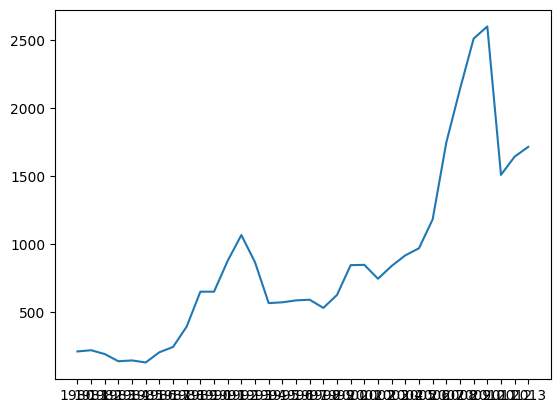

In [51]:
# Para nuestro analisis a ver los cambios atraves de los años, el gráfico que mejor se adapta es un gráfico de lineas
# Usresmo la función plo de plt.
# Crearemos nuestra primera figura.
plt.plot(df_brasil['ano'], df_brasil['inmigrantes'])

#### Mejorando la vizualización del gráfico

In [52]:
# Vamos a crear un rango de cada 5 años para vizualizar mejor
cada_5anos = list(map(str, range(1980, 2014, 5)))
cada_5anos

['1980', '1985', '1990', '1995', '2000', '2005', '2010']

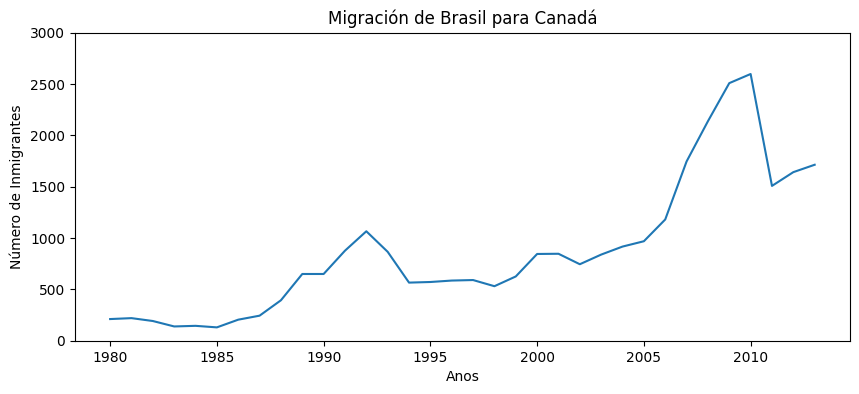

In [53]:
plt.figure(figsize=(10,4)) # Con figure podemos configurar el tamaño del gráfico (La medida es pulgadas)
plt.plot(df_brasil['ano'], df_brasil['inmigrantes'])
plt.title('Migración de Brasil para Canadá')
plt.ylabel('Número de Inmigrantes')
plt.xlabel('Anos')
plt.xticks(cada_5anos) # Usamo xticks para agregar la lista de años que creamos.
plt.yticks(list(range(0,3001,500))) # Aqui pasamos una lista con los rangos de queremos reflejar
plt.show() ### Este codigo permite mostrar la visualización del grafico sin mostrar las informaciones de memoria.
# La función show debe ser colocada siempre al final, si esta se coloca antes no mostrará el resto del grafico

### Desafio: comparando tendências de imigração

Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Nós criamos um gráfico com a função plt.plot() para analisar as intrigantes tendências de imigração do Brasil para o Canadá, no período de 1980 a 2013. Neste momento temos uma nova demanda: criar um gráfico de linhas comparando os números de imigrantes do Brasil e Argentina para o Canadá, que são os maiores países da América do Sul.

Prepare-se para um mergulho fascinante nas linhas que conectam esses países da América do Sul ao território canadense. Nessa missão, a elaboração desse gráfico pode ser útil para a compreensão das tendências migratórias desses países para o Canadá ao longo do tempo e como elas se comparam entre si. Ao analisar esses fatores, podemos obter uma visão mais abrangente do cenário migratório na América do Sul.

Fique tranquila(o)!

Essa nova tarefa é mais desafiadora, pois exige uma análise comparativa entre dois países. No entanto, ela também permitirá com que você obtenha uma aprendizagem enriquecedora. Por isso, explore as diversas possibilidades e lembre-se dos elementos essenciais de um gráfico: título, rótulos nos eixos x e y e os ticks do eixo x, que devem ser definidos de 5 em 5 anos.

Além disso, você precisará descobrir como adicionar uma legenda para que seja possível identificar a linha de cada país. Ao seguir essas orientações, você terá construído um gráfico robusto que te permitirá uma análise significativa e aprofundada.

Após criar o gráfico analise o resultado obtido e reflita nas seguintes questões:

1. Há alguma tendência ou padrão comum nos dados dos dois países?
2. Quais são os períodos com maior número de imigrantes nos dois países?

In [54]:
argentina = df.loc['Argentina', anos]
argentina_dict = {
    'anos' : argentina.index.tolist(),
    'inmigrantes' : argentina.values.tolist()
}
df_argentina = pd.DataFrame(argentina_dict)
df_argentina.head()

,anos,inmigrantes
0,1980,368
1,1981,426
2,1982,626
3,1983,241
4,1984,237


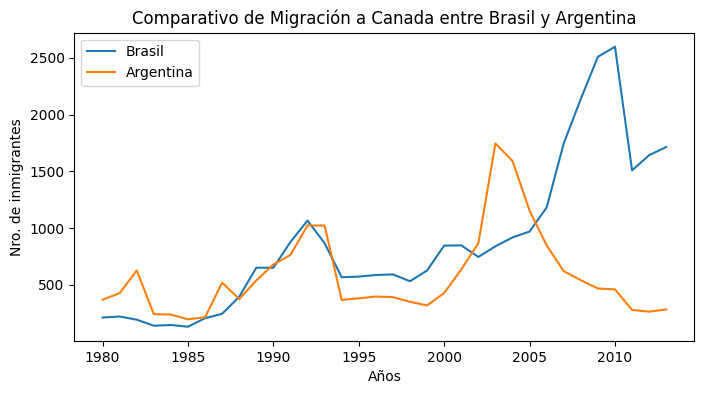

In [74]:
plt.figure(figsize=(8,4)) # Tamaño del gráfico
plt.plot( df_brasil['ano'], df_brasil['inmigrantes'], label= 'Brasil')
plt.plot(df_argentina['anos'], df_argentina['inmigrantes'], label= 'Argentina')
plt.title('Comparativo de Migración a Canada entre Brasil y Argentina')
plt.xticks(cada_5anos)
plt.xlabel('Años')
plt.ylabel('Nro. de inmigrantes')
plt.legend()
plt.show() # Elimina texto de salida